## Importing Libraries

In [1]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout
%matplotlib inline

In [2]:
def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    from sklearn.datasets import load_iris
    iris_data=load_iris()
    data=iris_data['data']
    targets=iris_data['target']
    train_data, test_data, train_targets, test_targets=train_test_split(data,targets,test_size=.1)
    return (train_data, test_data, train_targets, test_targets)
    

## Preprocessing

In [3]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [4]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

## Building a CNN model

In [5]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model=Sequential([
        Dense(64,activation='relu', input_shape=input_shape,kernel_initializer=tf.initializers.he_normal(),bias_initializer="ones"),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(3,activation='softmax')
    ])
    return model

In [6]:
model = get_model(train_data[0].shape)

In [7]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    from tensorflow.keras.models import Sequential
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    

In [8]:
compile_model(model)

In [9]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    history=model.fit(train_data, train_targets,epochs=epochs,batch_size=40,validation_split=0.15)
    return history
    

In [10]:
history = train_model(model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 1s 9ms/sample - loss: 1.0962 - accuracy: 0.3333 - val_loss: 1.0162 - val_accuracy: 0.3810
Epoch 2/800
114/114 [==============================] - 0s 140us/sample - loss: 1.0168 - accuracy: 0.4649 - val_loss: 0.9551 - val_accuracy: 0.7619
Epoch 3/800
114/114 [==============================] - 0s 162us/sample - loss: 0.9669 - accuracy: 0.5614 - val_loss: 0.9021 - val_accuracy: 0.8095
Epoch 4/800
114/114 [==============================] - 0s 162us/sample - loss: 0.9179 - accuracy: 0.7368 - val_loss: 0.8513 - val_accuracy: 0.8571
Epoch 5/800
114/114 [==============================] - 0s 175us/sample - loss: 0.8592 - accuracy: 0.9561 - val_loss: 0.8058 - val_accuracy: 0.9524
Epoch 6/800
114/114 [==============================] - 0s 170us/sample - loss: 0.8086 - accuracy: 0.9737 - val_loss: 0.7714 - val_accuracy: 0.9048
Epoch 7/800
114/114 [==============================] - 0s 184us/sample - lo

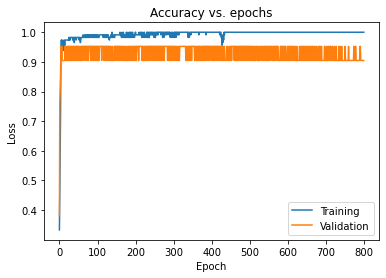

In [11]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

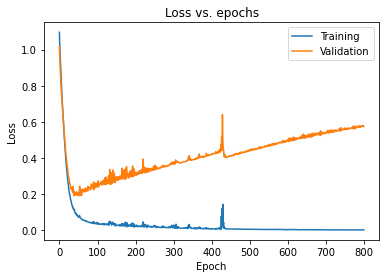

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [13]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    model=Sequential([
        Dense(64,activation='relu', input_shape=input_shape,kernel_initializer=tf.initializers.he_normal(),bias_initializer="ones",
             kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),      
        Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3,activation='softmax')
    ])
    return model

In [14]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [15]:
compile_model(reg_model)

In [16]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 2s 20ms/sample - loss: 2.0143 - accuracy: 0.3421 - val_loss: 1.9510 - val_accuracy: 0.4286
Epoch 2/800
114/114 [==============================] - 0s 174us/sample - loss: 2.0003 - accuracy: 0.2895 - val_loss: 1.9459 - val_accuracy: 0.4286
Epoch 3/800
114/114 [==============================] - 0s 175us/sample - loss: 1.9921 - accuracy: 0.3246 - val_loss: 1.9400 - val_accuracy: 0.4286
Epoch 4/800
114/114 [==============================] - 0s 210us/sample - loss: 1.9435 - accuracy: 0.3947 - val_loss: 1.9345 - val_accuracy: 0.4286
Epoch 5/800
114/114 [==============================] - 0s 192us/sample - loss: 1.9768 - accuracy: 0.3509 - val_loss: 1.9315 - val_accuracy: 0.4286
Epoch 6/800
114/114 [==============================] - 0s 193us/sample - loss: 1.9236 - accuracy: 0.4474 - val_loss: 1.9290 - val_accuracy: 0.4286
Epoch 7/800
114/114 [==============================] - 0s 183us/sample - l

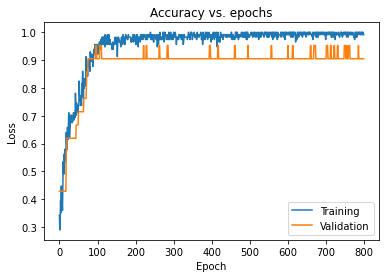

In [17]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

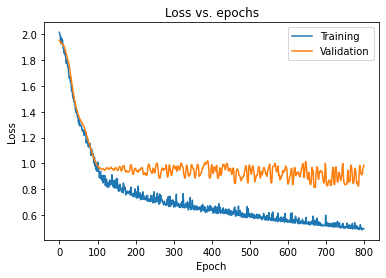

In [18]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [19]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=20, verbose=0, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0)
    early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,mode='min')
    return (early_stopping, learning_rate_reduction)

In [20]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [21]:
learning_rate_reduction.patience

20

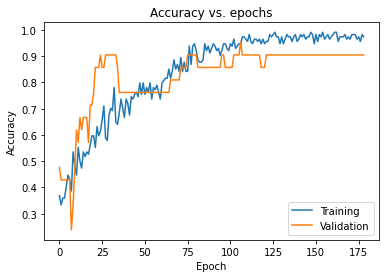

In [22]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

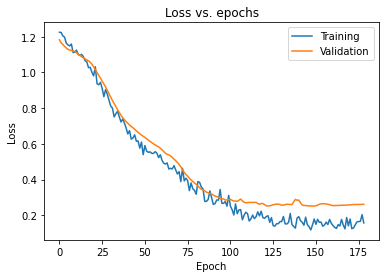

In [23]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [24]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.095
Test accuracy: 100.00%
